<!-- The hypothesis to prove inbetween the variables:
x:
Work instrumental support expectations (T1) 
Work relational support expectations (T1) 
Work role overload (T1) 
Work emotional demands (T1)
Family instrumental support expectations (T1)
Family relational support expectations (T1)
Family role overload (T1) 
Family emotional demands (T1) 

y:
Work role adjustment (T1)

The columns from above depicts the image in the paper, which translates to the following columns on the data:

x
(positive)
wcowinsexphelp 1 
wallcowexp1
____________
average_wcowinsexphelp
average_wallcowexp
average_faminstexp
average_famallexp


(negative)
roleover1
wemotdem 1
___________
average_roleover
average_wemotdem

average_froleover
average_femotdem
y:
workadj1
________
average_fadj

+


 -->


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the CSV
file_path = "../preprocessed_data.csv"  
data = pd.read_csv(file_path)

# Step 2: Filter Columns
# Specifying the columns that I want to keep for ML model
filtered_data = data[['average_wsitcon','average_wroleconflict','average_wintconflictd','average_wintconflictf','average_froleconf',
                      'average_fintconfd','average_fintconff','average_burn','average_wtimepres','average_wnovel','average_wpeopresp',
      'average_ftimepres','average_wrclar','average_cogflex','average_supsup','average_cowsup','average_parsup','average_famsup','average_wcowinsexphelp', 'average_wallcowexp', 
      'average_roleover', 'average_wemotdem','average_faminstexp', 'average_famallexp', 'average_froleover','average_femotdem','average_fadj']]


In [28]:
data['average_fintconff']

0      3.666667
1      3.666667
2      2.000000
3      2.000000
4      2.333333
         ...   
574    3.333333
575    1.333333
576    2.333333
577    1.666667
578    2.000000
Name: average_fintconff, Length: 579, dtype: float64

Correlation Matrix

In [29]:
correlation_matrix = filtered_data.corr(method='pearson')  
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                         average_wsitcon  average_wroleconflict  \
average_wsitcon                1.000000               0.685288   
average_wroleconflict          0.685288               1.000000   
average_wintconflictd          0.663943               0.690579   
average_wintconflictf          0.569855               0.619908   
average_froleconf              0.641966               0.715335   
average_fintconfd              0.636408               0.613419   
average_fintconff              0.562562               0.534877   
average_burn                   0.528883               0.566078   
average_wtimepres              0.713839               0.703730   
average_wnovel                 0.381626               0.397631   
average_wpeopresp              0.331769               0.317094   
average_ftimepres              0.654365               0.686462   
average_wrclar                 0.029371              -0.117515   
average_cogflex                0.426993               0

Correlation Matrix filtered to check the relation between each X and y

In [30]:

correlations = filtered_data.corr()["average_fadj"].sort_values(ascending=False)
# Display correlation of each feature with the target
print("Correlation of features with average_fadj  :")
print(correlations)

Correlation of features with average_fadj  :
average_fadj              1.000000
average_famallexp         0.473396
average_parsup            0.458273
average_cowsup            0.454458
average_wrclar            0.444292
average_famsup            0.434341
average_wallcowexp        0.382738
average_cogflex           0.358847
average_supsup            0.355606
average_faminstexp        0.245824
average_wpeopresp         0.245584
average_wcowinsexphelp    0.217695
average_wnovel            0.159869
average_wemotdem          0.103241
average_femotdem          0.100989
average_froleover         0.004045
average_wsitcon          -0.028258
average_fintconff        -0.048636
average_wintconflictf    -0.050557
average_roleover         -0.056790
average_wintconflictd    -0.065438
average_wroleconflict    -0.073208
average_fintconfd        -0.100019
average_wtimepres        -0.115955
average_ftimepres        -0.117108
average_burn             -0.127670
average_froleconf        -0.153352
Name: aver

ML modeling

In [31]:
# Features and target
X = filtered_data.drop(columns=['average_fadj'])
y = filtered_data['average_fadj']


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.34


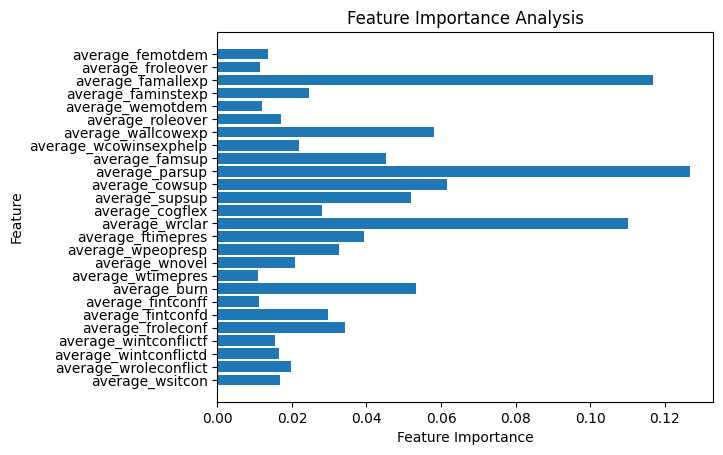

In [33]:
import matplotlib.pyplot as plt

# Feature importance
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Analysis")
plt.show()


In [34]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform Grid Search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters and MSE
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
print(f"Tuned Mean Squared Error: {mse_tuned:.2f}")


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Mean Squared Error: 0.33


update

In [35]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestRegressor(random_state=42,max_depth= 10,min_samples_leaf=2, min_samples_split=2,n_estimators=200)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.33


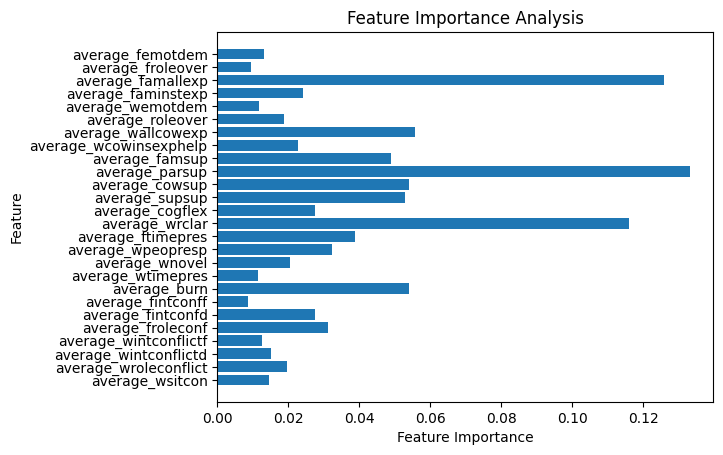

In [36]:

# Feature importance
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Analysis")
plt.show()

Cross-Validation
Use cross-validation to ensure the model performs consistently across different subsets of the data.

In [37]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
print(f"Cross-Validated Mean Squared Error: {cv_mse:.2f}")


Cross-Validated Mean Squared Error: 0.38


 Check for Overfitting
Compare training and testing errors. If the training error is much lower, your model might be overfitting

In [38]:
# Training error
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Training Mean Squared Error: {mse_train:.2f}")


Training Mean Squared Error: 0.07


In [39]:
import pandas as pd
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)
print(feature_importances)


                   Feature  Importance
16          average_parsup    0.133081
23       average_famallexp    0.125832
12          average_wrclar    0.115921
19      average_wallcowexp    0.055534
7             average_burn    0.054106
15          average_cowsup    0.054055
14          average_supsup    0.052785
17          average_famsup    0.048967
11       average_ftimepres    0.038890
10       average_wpeopresp    0.032337
4        average_froleconf    0.031238
5        average_fintconfd    0.027596
13         average_cogflex    0.027459
22      average_faminstexp    0.024210
18  average_wcowinsexphelp    0.022623
9           average_wnovel    0.020475
1    average_wroleconflict    0.019748
20        average_roleover    0.018796
2    average_wintconflictd    0.015013
0          average_wsitcon    0.014546
25        average_femotdem    0.013144
3    average_wintconflictf    0.012552
21        average_wemotdem    0.011597
8        average_wtimepres    0.011444
24       average_froleove

Global Correlation Insights

While Random Forests are non-linear models, you can compute Pearson correlation coefficients between each feature and the target (workadj1) to check for linear relationships.

In [40]:
correlations = X.join(y).corr()['average_fadj']
print(correlations.sort_values(ascending=False))


average_fadj              1.000000
average_famallexp         0.473396
average_parsup            0.458273
average_cowsup            0.454458
average_wrclar            0.444292
average_famsup            0.434341
average_wallcowexp        0.382738
average_cogflex           0.358847
average_supsup            0.355606
average_faminstexp        0.245824
average_wpeopresp         0.245584
average_wcowinsexphelp    0.217695
average_wnovel            0.159869
average_wemotdem          0.103241
average_femotdem          0.100989
average_froleover         0.004045
average_wsitcon          -0.028258
average_fintconff        -0.048636
average_wintconflictf    -0.050557
average_roleover         -0.056790
average_wintconflictd    -0.065438
average_wroleconflict    -0.073208
average_fintconfd        -0.100019
average_wtimepres        -0.115955
average_ftimepres        -0.117108
average_burn             -0.127670
average_froleconf        -0.153352
Name: average_fadj, dtype: float64


In [41]:
!pip install shap



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: C:\Users\reema\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


 SHAP Values (SHapley Additive exPlanations)
SHAP values explain the output of a machine learning model by assigning each feature an importance value for each prediction. It provides a global view of feature impact as well as local explanations for individual predictions.

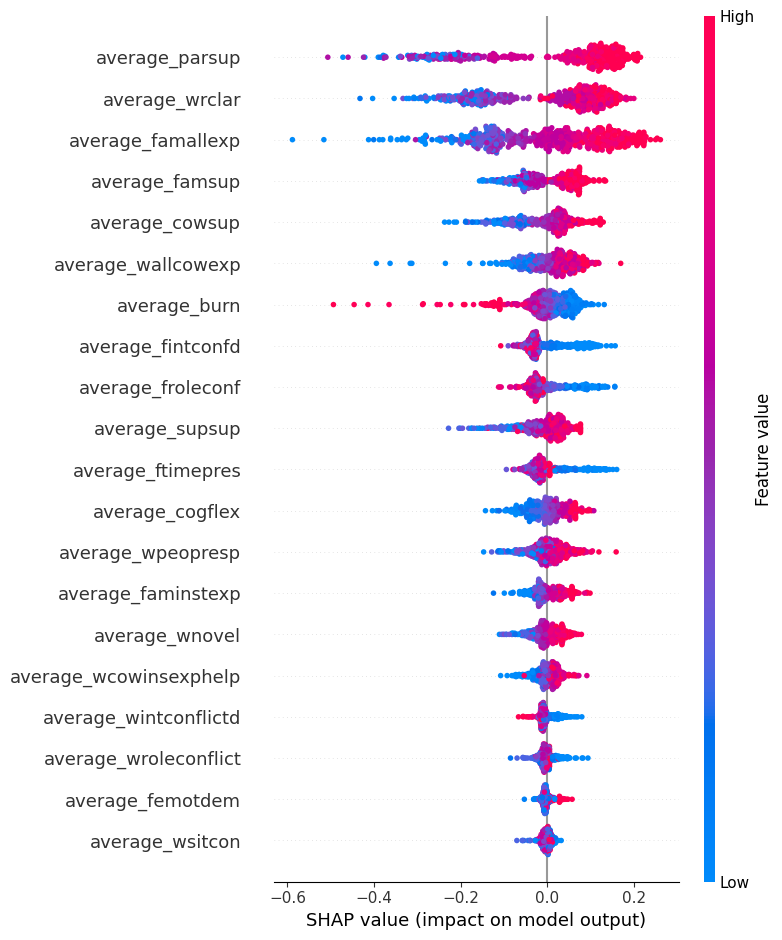

In [42]:
import shap

# Explain the model's predictions
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Visualize global feature importance
shap.summary_plot(shap_values, X)


<!-- The SHAP (SHapley Additive exPlanations) summary plot shows the impact of four features on the model's output, with each point representing a data instance. Here’s a breakdown:

average_wallcowexp:

Higher values (pink) positively impact the model output, while lower values (blue) negatively impact it.
This feature has the strongest positive influence on the output.
average_roleover:

Higher values (pink) generally push the model output toward the negative side.
It has a negative impact on the model output, especially for higher values.
average_wcowinsexphelp:

Higher values (pink) show a slight positive influence, while lower values (blue) tend to push the output negatively.
The effect is relatively small but positive.
average_wemotdem:

Both low and high values have minimal impact on the output, centered around zero.
It is the least impactful feature among the four.
Summary:
Key Influencer: average_wallcowexp has the most significant positive impact.
Negative Impact: average_roleover reduces the model output.
Lesser Impact: average_wcowinsexphelp and average_wemotdem have smaller, mixed influences. -->


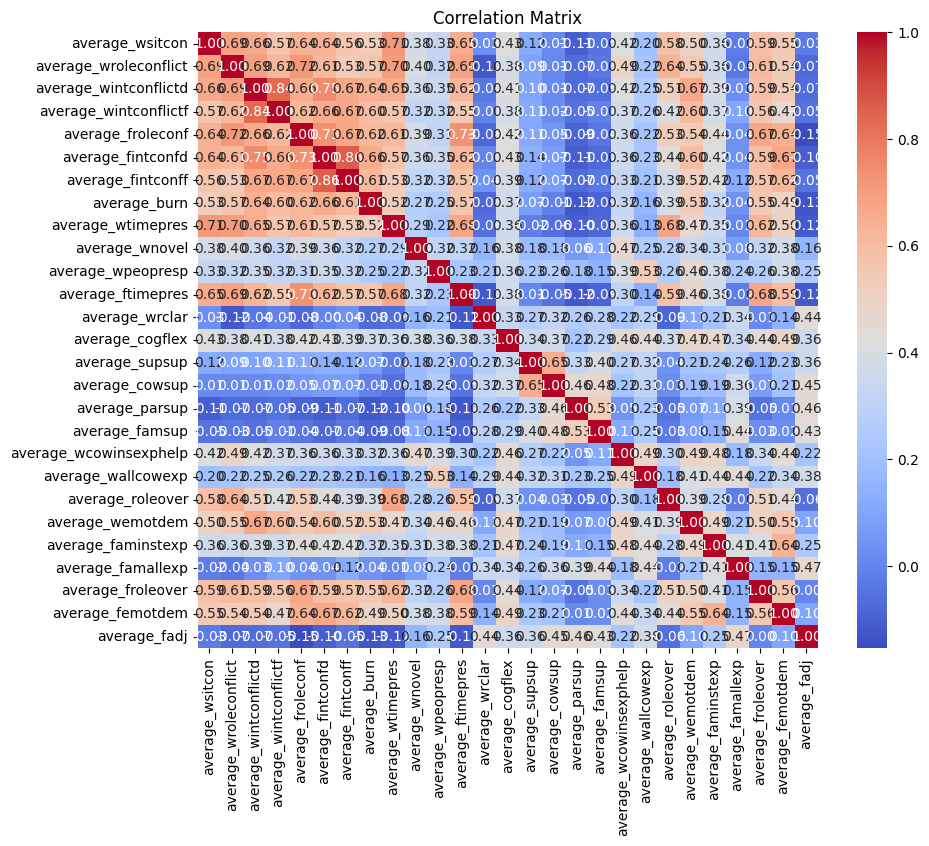

In [43]:
import seaborn as sns

# Compute correlation matrix
corr = X.join(y).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


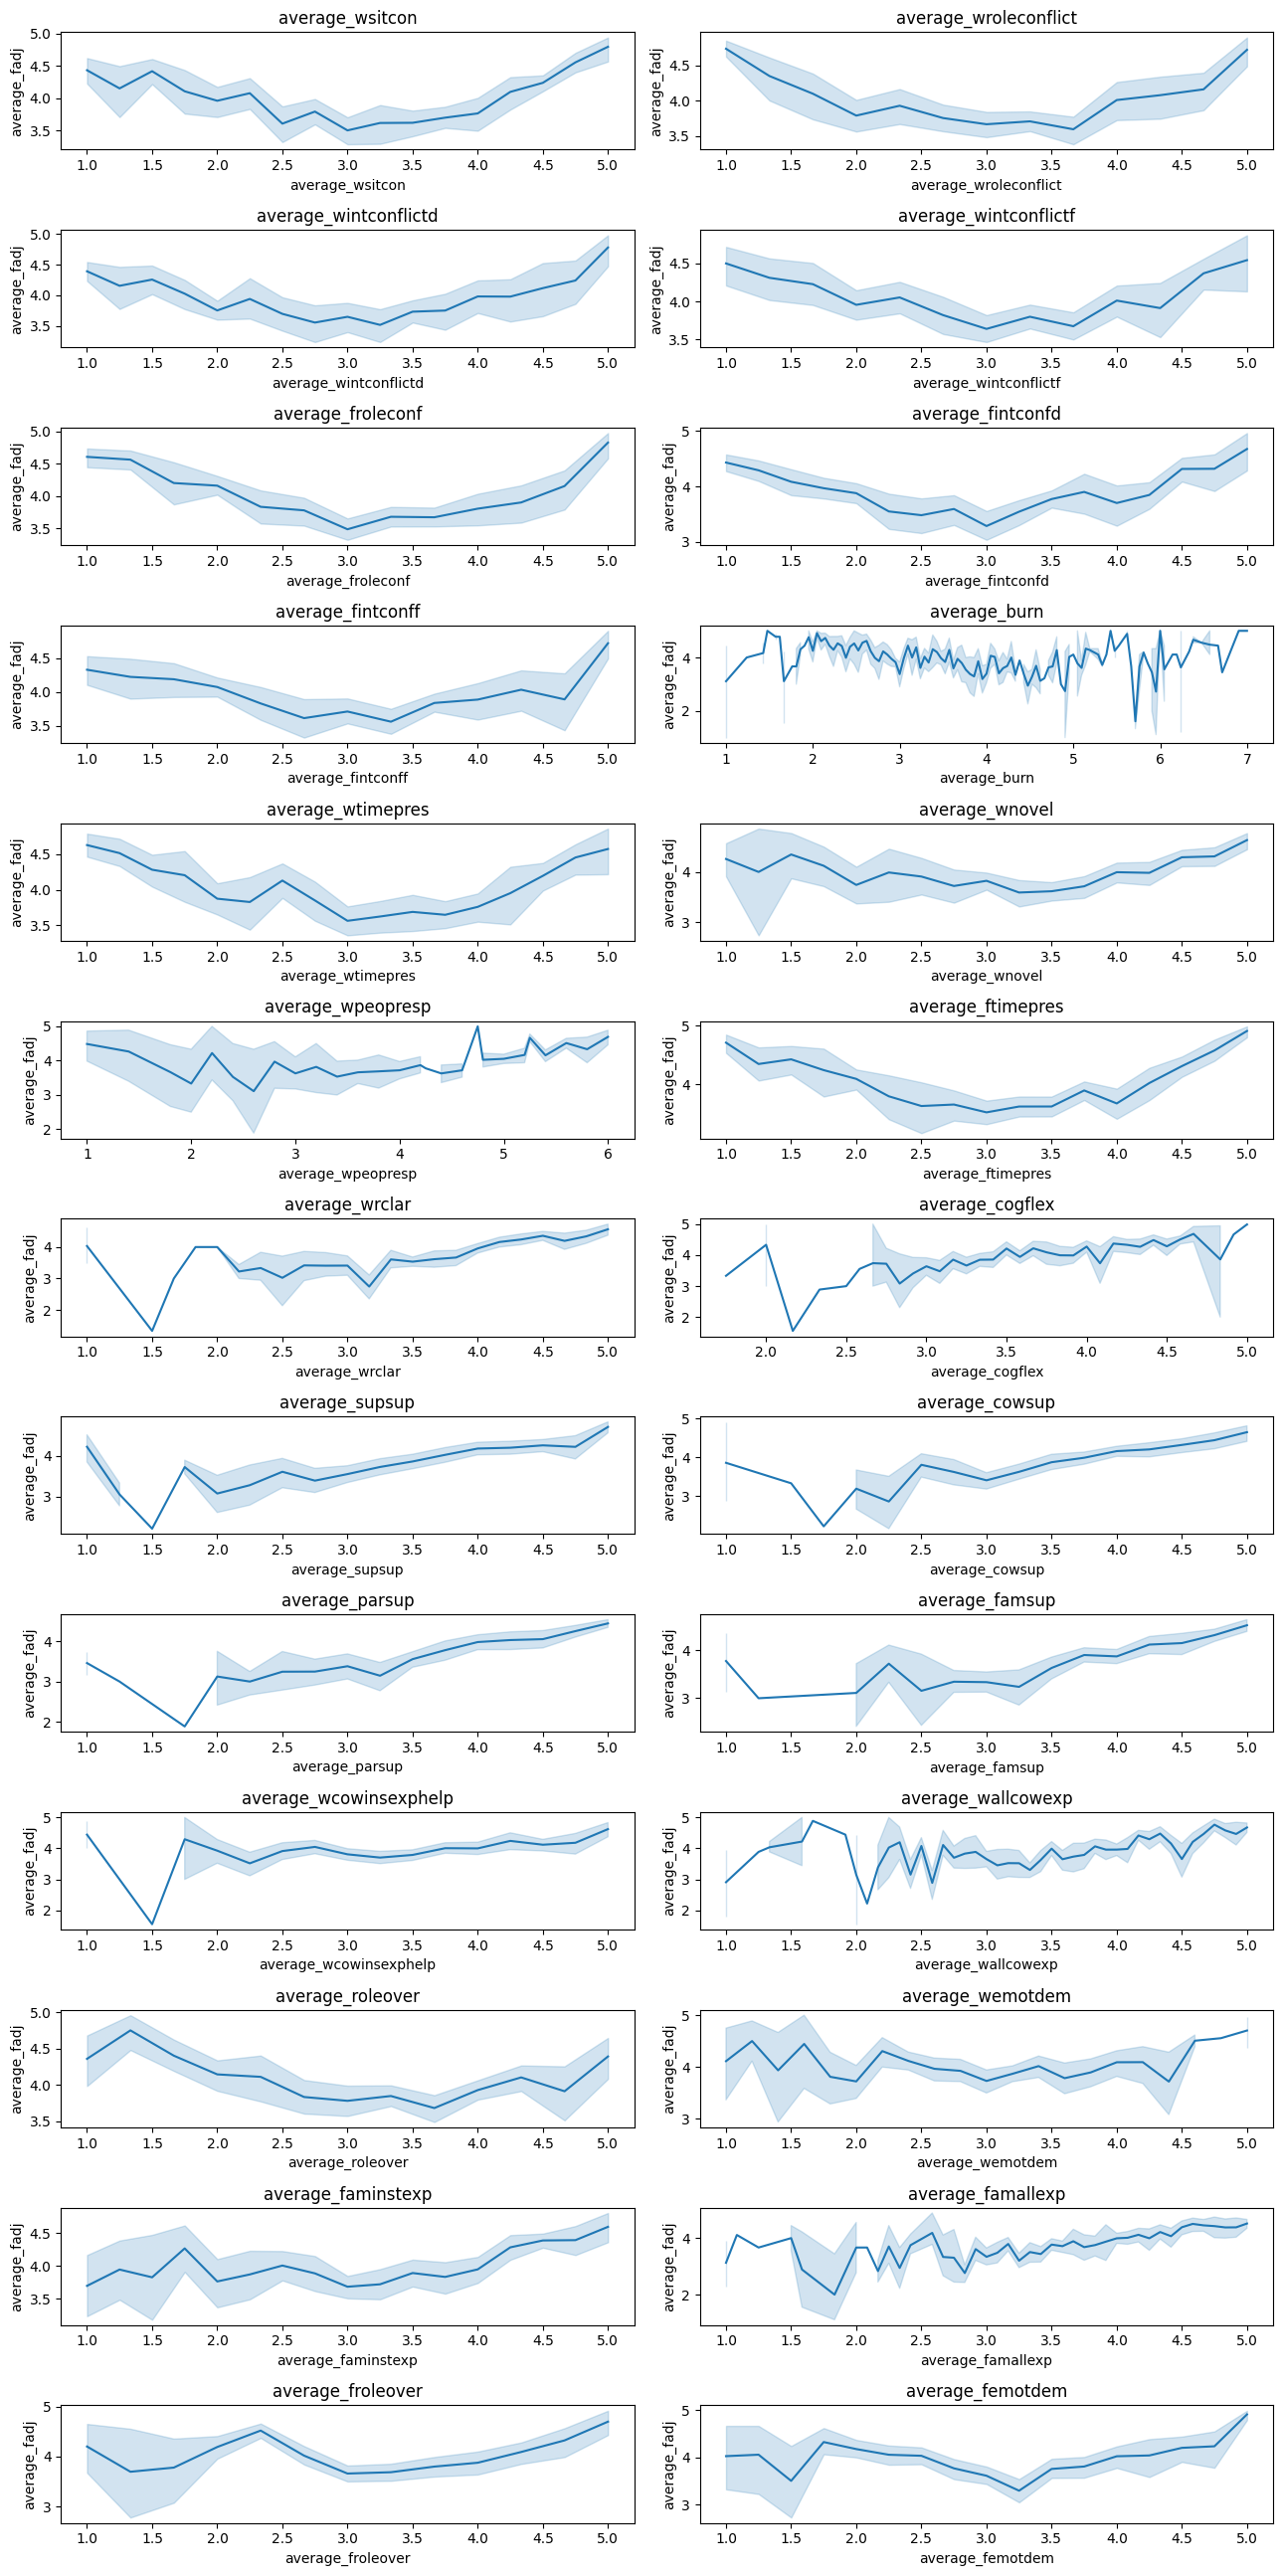

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid of subplots (2 rows, 2 columns)
import matplotlib.pyplot as plt
import seaborn as sns
import math

# List of features to plot
features = ['average_wsitcon','average_wroleconflict','average_wintconflictd','average_wintconflictf','average_froleconf',
                      'average_fintconfd','average_fintconff','average_burn','average_wtimepres','average_wnovel','average_wpeopresp',
      'average_ftimepres','average_wrclar','average_cogflex','average_supsup','average_cowsup','average_parsup','average_famsup','average_wcowinsexphelp', 'average_wallcowexp', 
      'average_roleover', 'average_wemotdem','average_faminstexp', 'average_famallexp', 'average_froleover','average_femotdem']

# Set the number of columns and calculate rows dynamically
columns = 2
rows = math.ceil(len(features) / columns)

# Create the subplots
fig, axs = plt.subplots(rows, columns, figsize=(13, rows * 2))

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Loop through the features and plot each one
for i, feature in enumerate(features):
    sns.lineplot(x=X[feature], y=y, ax=axs[i])
    axs[i].set_title(f"{feature}")
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("average_fadj")

# Hide unused axes
for i in range(len(features), len(axs)):
    axs[i].set_visible(False)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()



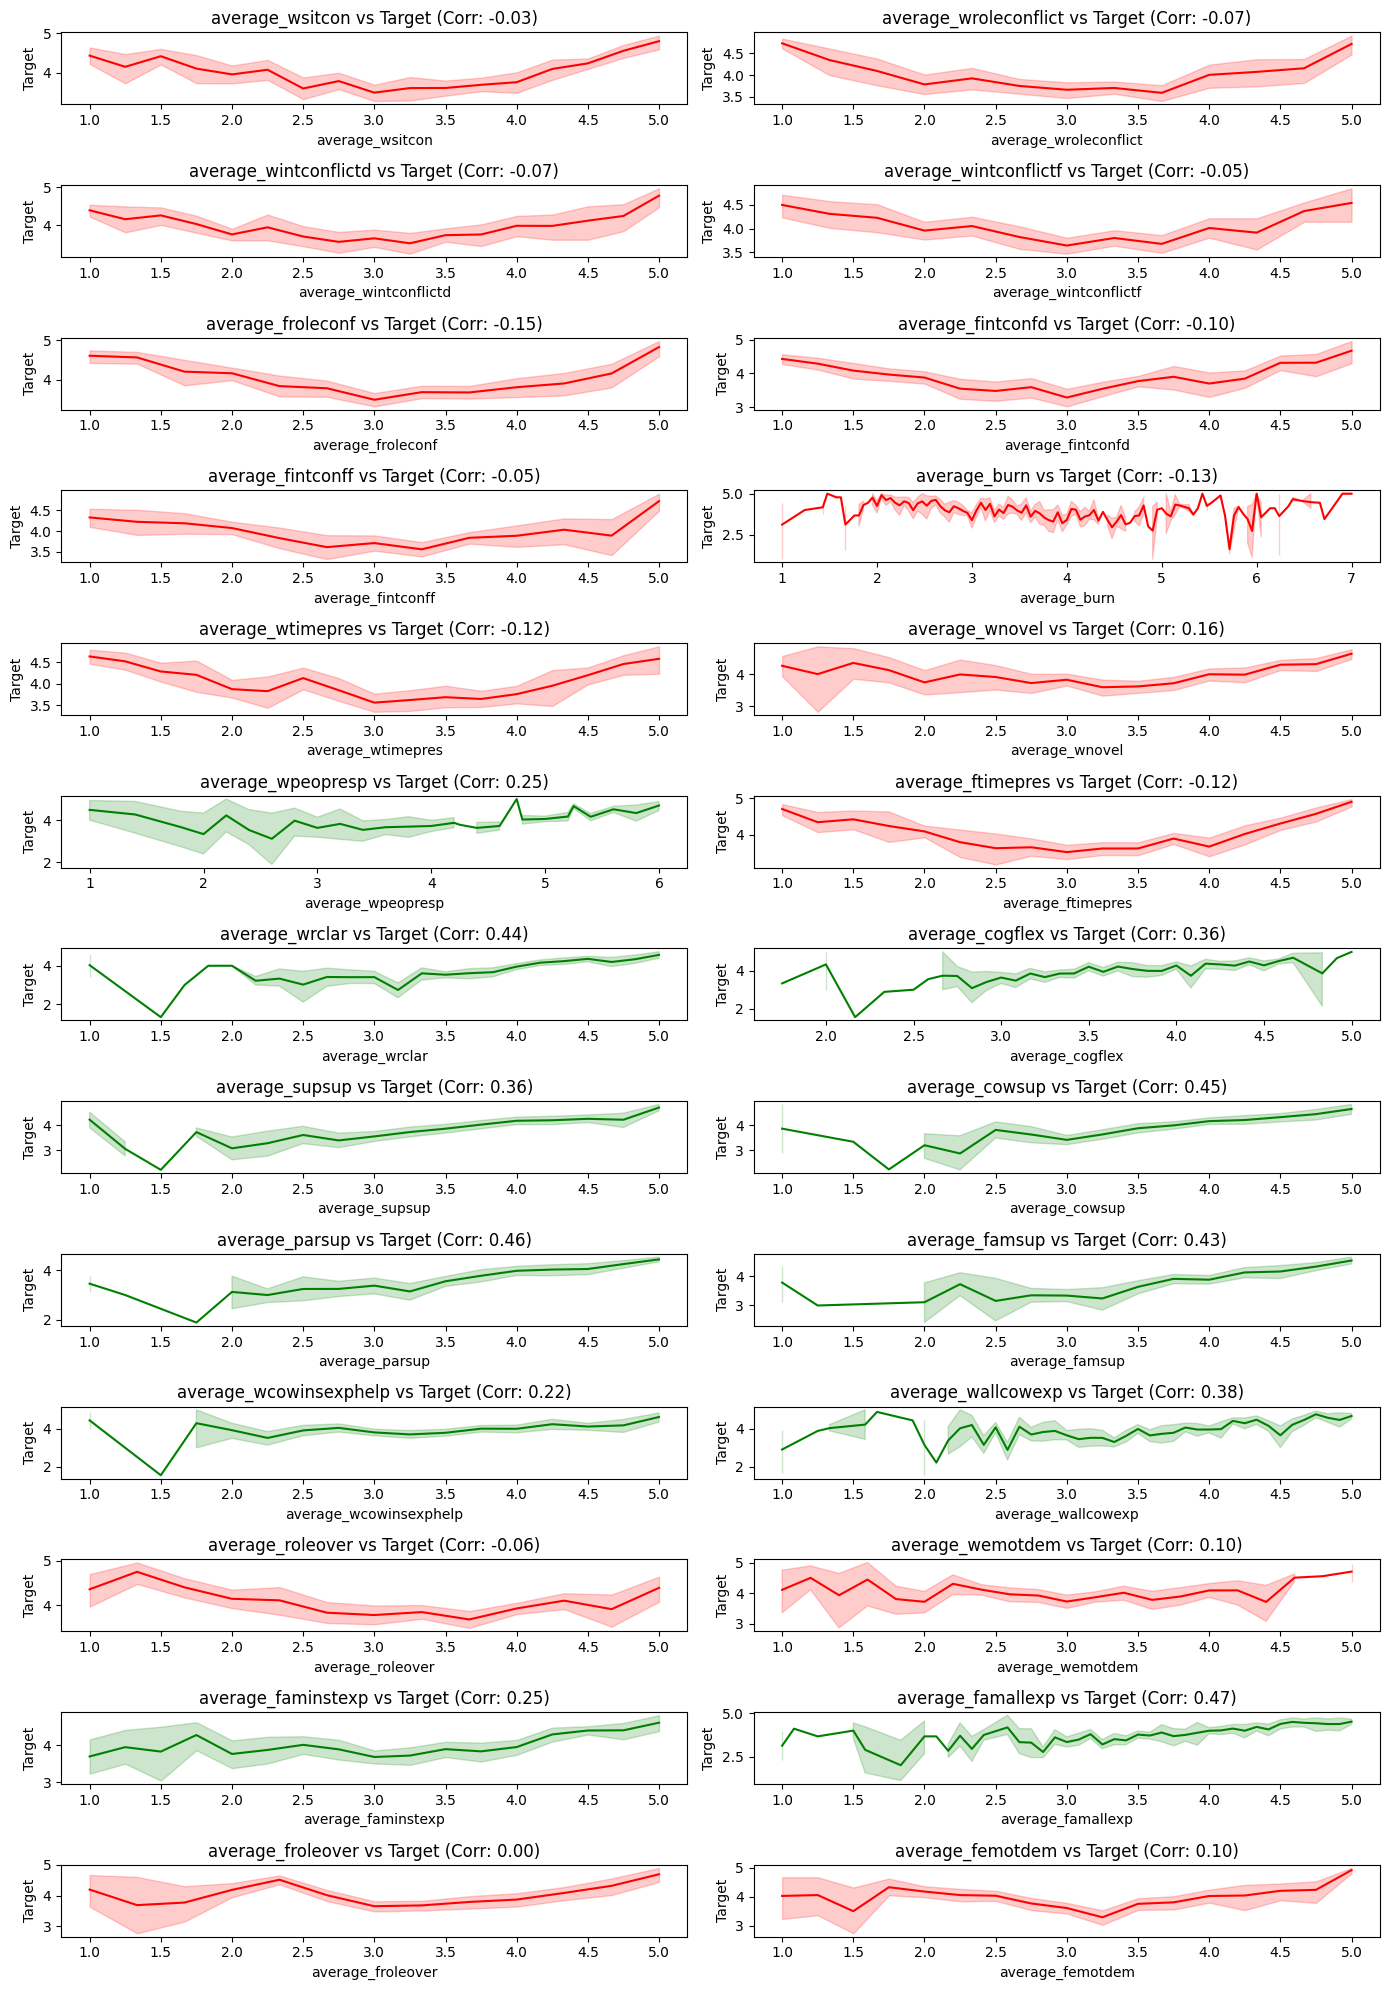

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate the correlation between each feature and the target
correlations = X.corrwith(y)

# Create a 2x2 grid of subplots (2 rows, 2 columns)
fig, axs = plt.subplots(13, 2, figsize=(14, 20))

# List of features to plot
features =['average_wsitcon','average_wroleconflict','average_wintconflictd','average_wintconflictf','average_froleconf',
                      'average_fintconfd','average_fintconff','average_burn','average_wtimepres','average_wnovel','average_wpeopresp',
      'average_ftimepres','average_wrclar','average_cogflex','average_supsup','average_cowsup','average_parsup','average_famsup','average_wcowinsexphelp', 'average_wallcowexp', 
      'average_roleover', 'average_wemotdem','average_faminstexp', 'average_famallexp', 'average_froleover','average_femotdem']

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Loop through the features and plot each one in a subplot
for i, feature in enumerate(features):
    # Get the correlation for the current feature
    corr = correlations[feature]
    
    # Set the color based on the correlation
    if corr > 0.2:
        color = 'green'  # Positive correlation
    elif corr < 0.2:
        color = 'red'    # Negative correlation
    else:
        color = 'blue'   # No correlation or neutral
    
    # Create a line plot
    sns.lineplot(x=X[feature], y=y, ax=axs[i], color=color)
    axs[i].set_title(f"{feature} vs Target (Corr: {corr:.2f})")
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Target")

# Adjust the layout so that plots do not overlap
plt.tight_layout()

# Show the plots
plt.show()


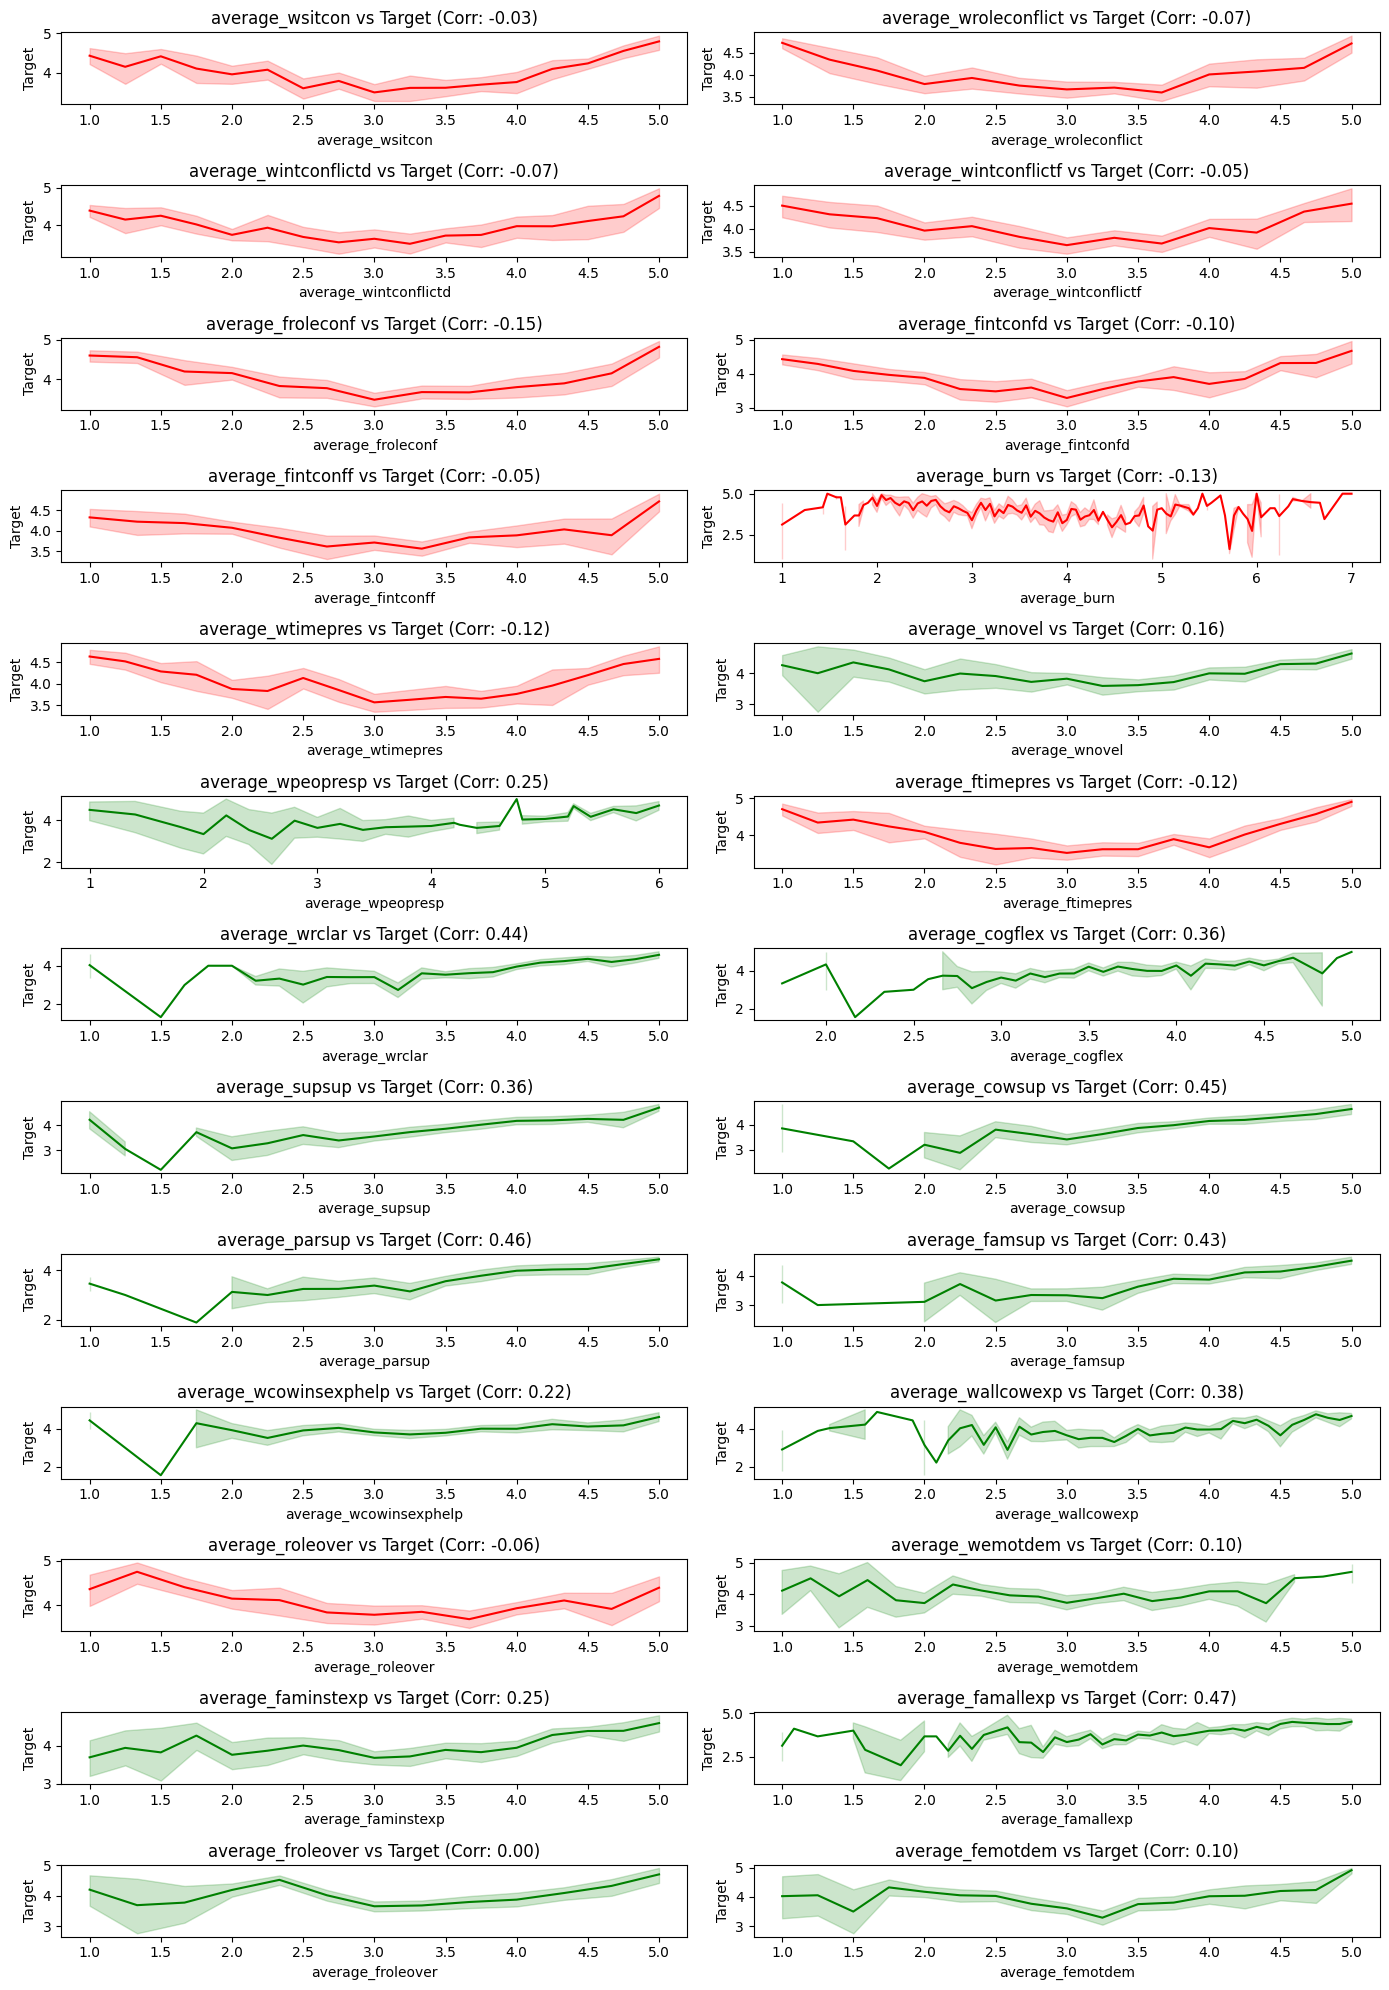

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate the correlation between each feature and the targeto
correlations = X.corrwith(y)

# Create a 2x2 grid of subplots (2 rows, 2 columns)
fig, axs = plt.subplots(13, 2, figsize=(14, 20))

# List of features to plot
features = ['average_wsitcon','average_wroleconflict','average_wintconflictd','average_wintconflictf','average_froleconf',
                      'average_fintconfd','average_fintconff','average_burn','average_wtimepres','average_wnovel','average_wpeopresp',
      'average_ftimepres','average_wrclar','average_cogflex','average_supsup','average_cowsup','average_parsup','average_famsup','average_wcowinsexphelp', 'average_wallcowexp', 
      'average_roleover', 'average_wemotdem','average_faminstexp', 'average_famallexp', 'average_froleover','average_femotdem']

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Loop through the features and plot each one in a subplot
for i, feature in enumerate(features):
    # Get the correlation for the current feature
    corr = correlations[feature]
    
    # Set the color based on the correlation
    if corr > 0:
        color = 'green'  # Positive correlation
    elif corr < 0:
        color = 'red'    # Negative correlation
    else:
        color = 'blue'   # No correlation or neutral
    
    # Create a line plot
    sns.lineplot(x=X[feature], y=y, ax=axs[i], color=color)
    axs[i].set_title(f"{feature} vs Target (Corr: {corr:.2f})")
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Target")

# Adjust the layout so that plots do not overlap
plt.tight_layout()

# Show the plots
plt.show()


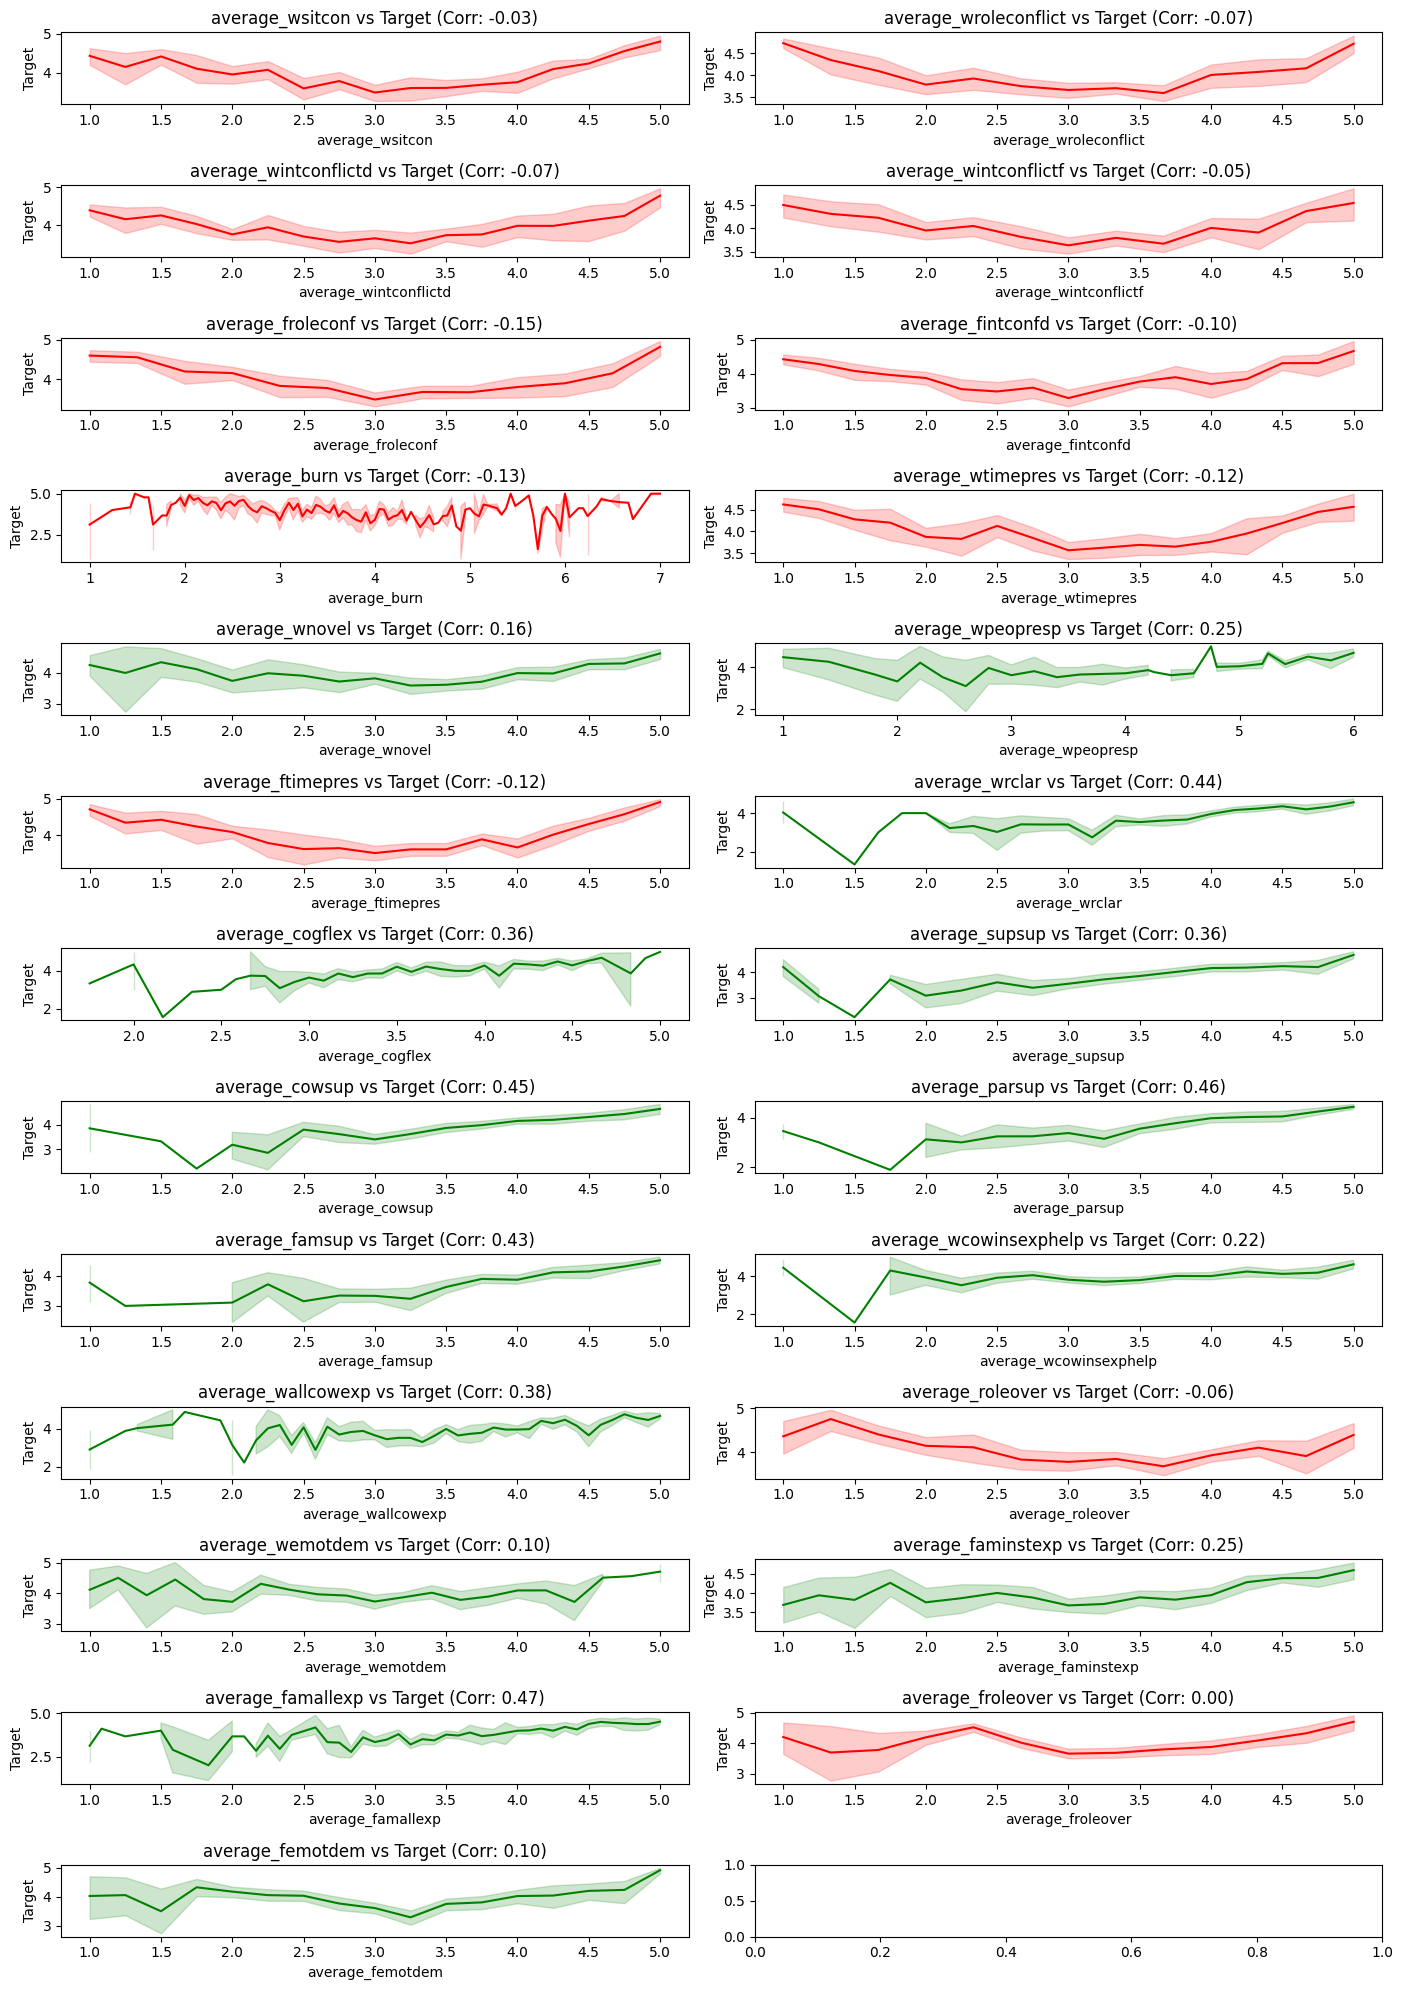

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate the correlation between each feature and the target
correlations = X.corrwith(y)

# Create a 2x2 grid of subplots (2 rows, 2 columns)
fig, axs = plt.subplots(13, 2, figsize=(14, 20))

# List of features to plot
features = ['average_wsitcon','average_wroleconflict','average_wintconflictd','average_wintconflictf','average_froleconf',
                      'average_fintconfd','average_burn','average_wtimepres','average_wnovel','average_wpeopresp',
      'average_ftimepres','average_wrclar','average_cogflex','average_supsup','average_cowsup','average_parsup','average_famsup','average_wcowinsexphelp', 'average_wallcowexp', 
      'average_roleover', 'average_wemotdem','average_faminstexp', 'average_famallexp', 'average_froleover','average_femotdem']

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Loop through the features and plot each one in a subplot
for i, feature in enumerate(features):
    # Get the correlation for the current feature
    corr = correlations[feature]
    
    # Set the color based on the correlation
    if corr > 0.1:
        color = 'green'  # Positive correlation
    elif corr < 0.1:
        color = 'red'    # Negative correlation
    else:
        color = 'blue'   # No correlation or neutral
    
    # Create a line plot
    sns.lineplot(x=X[feature], y=y, ax=axs[i], color=color)
    axs[i].set_title(f"{feature} vs Target (Corr: {corr:.2f})")
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Target")

# Adjust the layout so that plots do not overlap
plt.tight_layout()

# Show the plots
plt.show()
